In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.basicConfig(filename="prob.log", level=logging.DEBUG)

In [15]:
df = pd.read_csv('Data/Wimbledon_featured_matches.csv')

def divide_by_matches(df):
    return [df[df['match_id'] == i] for i in df['match_id'].unique()]

def divide_by_sets(match_df):
    return [match_df[match_df['set_no'] == i] for i in match_df['set_no'].unique()]

def divide_by_games(set_df):
    return [set_df[set_df['game_no'] == i] for i in set_df['game_no'].unique()]

def match_winner(match):
    last_row = match.iloc[-1]
    if last_row["p1_sets"] == last_row["p2_sets"]:
        return last_row["set_victor"]
    if last_row["p1_sets"] > last_row["p2_sets"]:
        return 1
    else:
        return 2

matches_df = divide_by_matches(df)

In [3]:
# print rows with nan values in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_poi

In [4]:
matches_df[0][matches_df[0]['set_no'] == 1]

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:41:23,1,9,59,0,0,5,...,0,0,0,16.514,17.962,4,88.0,BW,NCTL,ND
59,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:42:31,1,9,60,0,0,5,...,0,0,0,21.882,23.411,6,123.0,BC,NCTL,D
60,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:43:18,1,9,61,0,0,5,...,0,0,1,18.705,28.259,7,121.0,BC,NCTL,ND
61,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:43:59,1,9,62,0,0,5,...,0,0,0,2.109,3.140,1,130.0,C,NCTL,ND


In [5]:
set0 =divide_by_sets(matches_df[0])[0]
set0

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:41:23,1,9,59,0,0,5,...,0,0,0,16.514,17.962,4,88.0,BW,NCTL,ND
59,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:42:31,1,9,60,0,0,5,...,0,0,0,21.882,23.411,6,123.0,BC,NCTL,D
60,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:43:18,1,9,61,0,0,5,...,0,0,1,18.705,28.259,7,121.0,BC,NCTL,ND
61,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:43:59,1,9,62,0,0,5,...,0,0,0,2.109,3.140,1,130.0,C,NCTL,ND


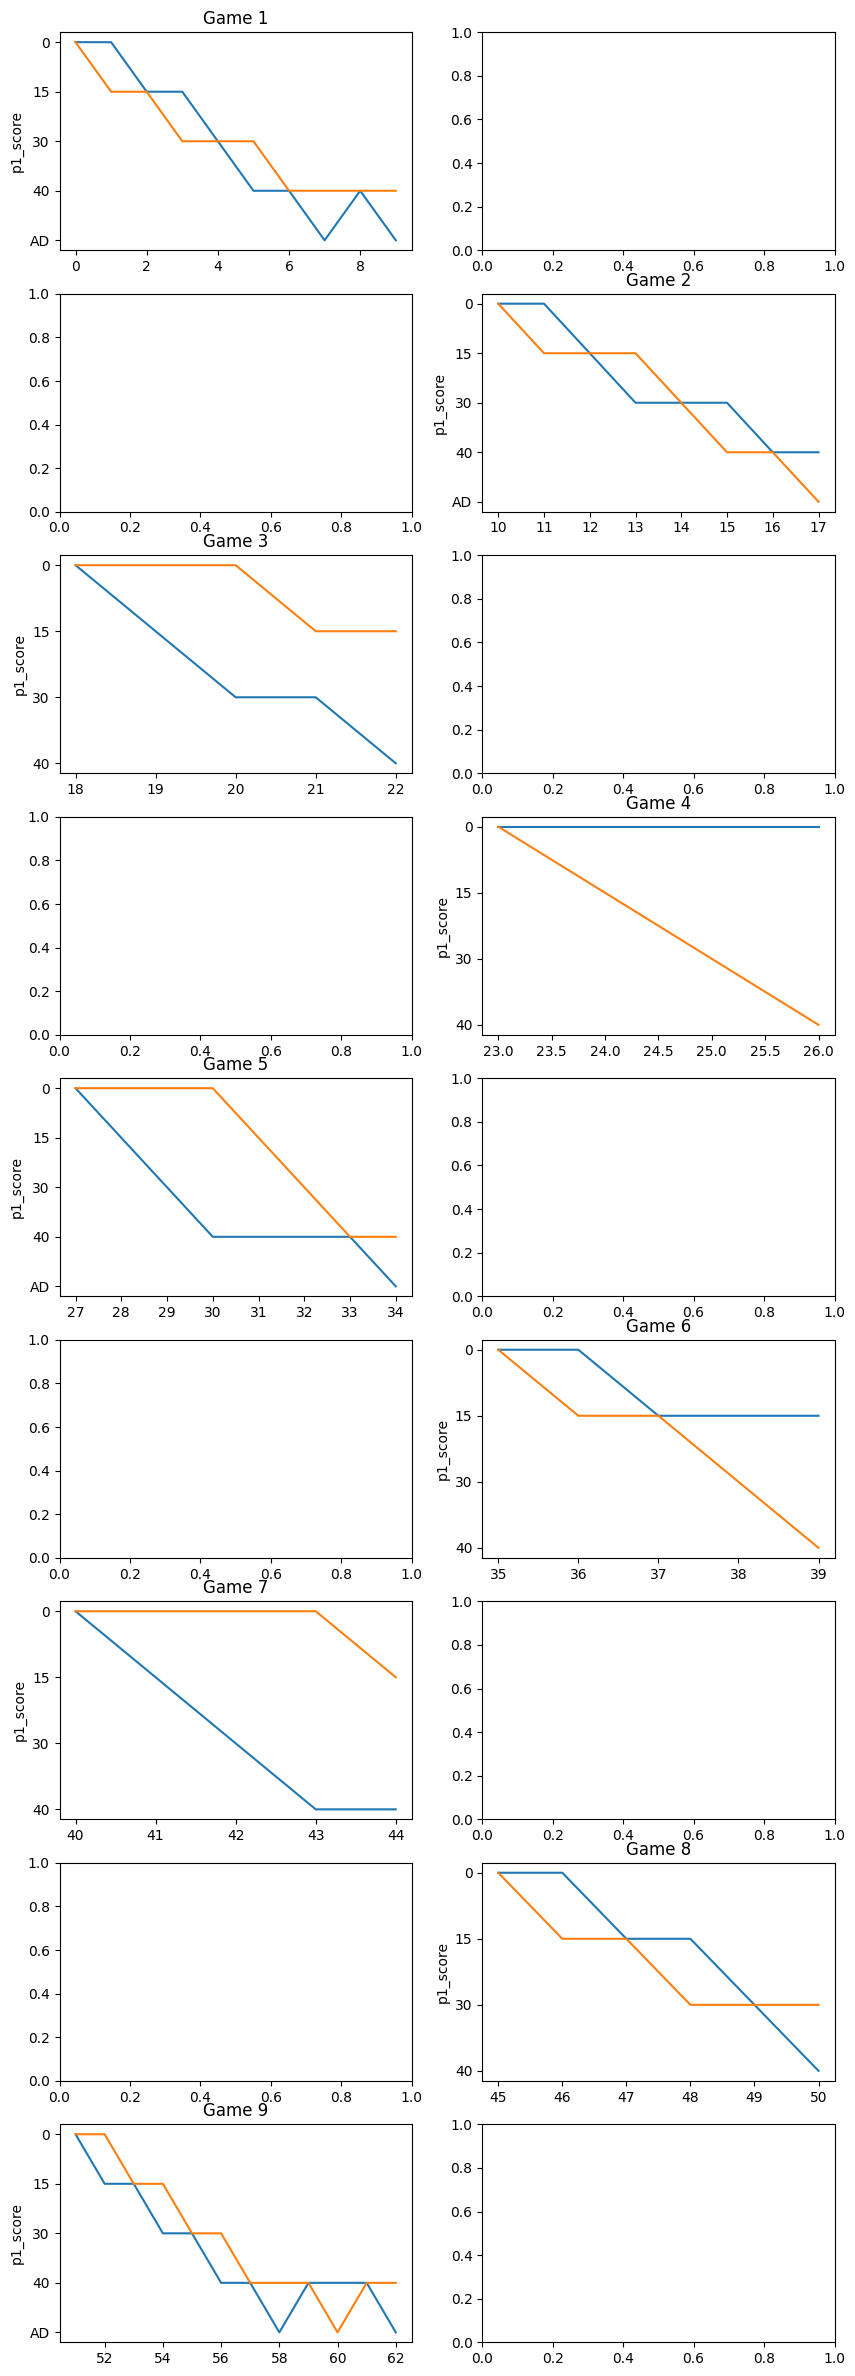

In [6]:
# plot the array of DataFrames

def plot_matches(set_df):
    games = divide_by_games(set_df)
    fig, ax = plt.subplots(len(games), 2, figsize=(10, 30))

    for i, game in enumerate(games):
        if i % 2 == 1:
            sns.lineplot(data=game["p1_score"], ax=ax[i, 1])
            sns.lineplot(data=game["p2_score"], ax=ax[i, 1])
            ax[i, 1].set_title(f"Game {i+1}")
        else:
            sns.lineplot(data=game["p1_score"], ax=ax[i, 0])
            sns.lineplot(data=game["p2_score"], ax=ax[i, 0])
            ax[i, 0].set_title(f"Game {i+1}")
        
    plt.show()

plot_matches(set0)


In [7]:
vic = np.array(divide_by_games(set0)[3]["point_victor"])
vic


array([2, 2, 2, 2])

In [8]:
# plot 
sns.lineplot(data=match0["p1_points_won"], label="p1_points_won")
sns.lineplot(data=match0["p2_points_won"], label="p2_points_won")
plt.title(f"Points won by each player winner {match_winner(match0)}")


NameError: name 'match0' is not defined

In [ ]:
# Calculate the number of times each player won consecutive points
def consecutive_points_in_a_game(game):
    pt_victor = np.array(game["point_victor"])
    sum = (pt_victor[:-1] + pt_victor[1:])
    p1 = (sum == 2).sum()
    p2 = (sum == 4).sum()
    return p1, p2

def three_consecutive_points_in_a_game(game):
    pt_victor = np.array(game["point_victor"])
    sum = (pt_victor[:-2] + pt_victor[1:-1] + pt_victor[2:])
    p1 = (sum == 3).sum()
    p2 = (sum == 6).sum()
    return p1, p2

three_consecutive_points_in_a_game(divide_by_games(set0)[3])
    

(0, 2)

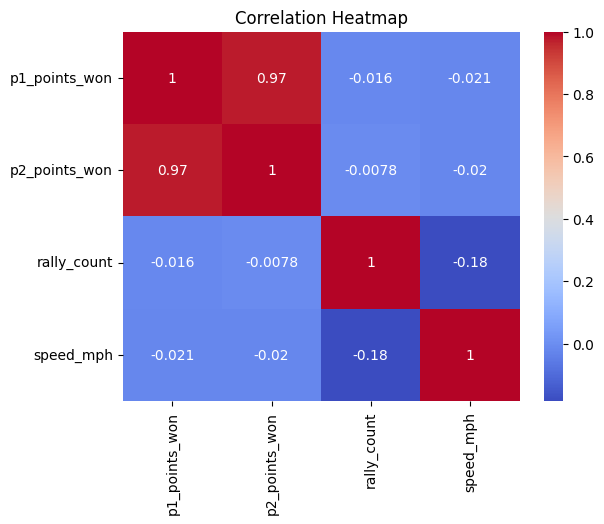

In [ ]:
# Select numerical features for correlation analysis
numerical_features = df[['p1_points_won', 'p2_points_won', 'rally_count', 'speed_mph']]

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


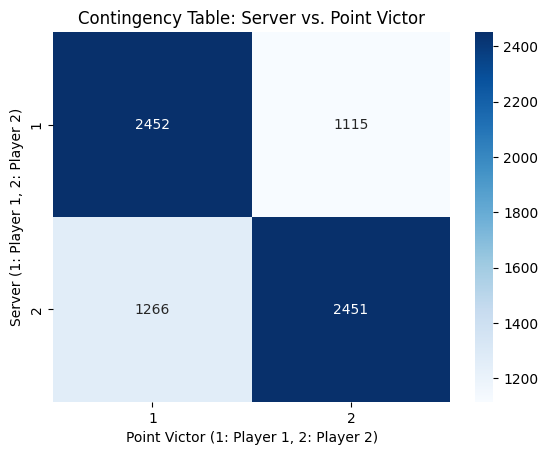

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['server'], df['point_victor'], df)

# Plot heatmap
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Contingency Table: Server vs. Point Victor')
plt.xlabel('Point Victor (1: Player 1, 2: Player 2)')
plt.ylabel('Server (1: Player 1, 2: Player 2)')
plt.show()

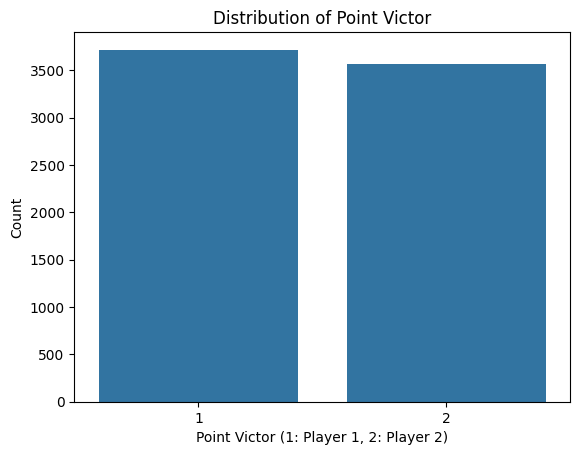

In [ ]:
sns.countplot(x='point_victor', data=df)
plt.title('Distribution of Point Victor')
plt.xlabel('Point Victor (1: Player 1, 2: Player 2)')
plt.ylabel('Count')
plt.show()

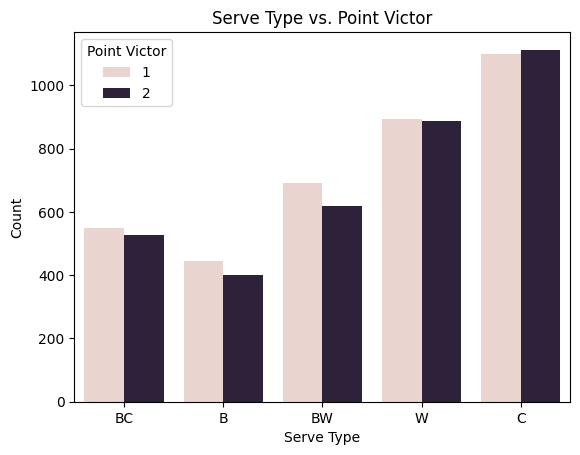

In [ ]:
sns.countplot(x='serve_width', hue='point_victor', data=df)
plt.title('Serve Type vs. Point Victor')
plt.xlabel('Serve Type')
plt.ylabel('Count')
plt.legend(title='Point Victor')
plt.show()


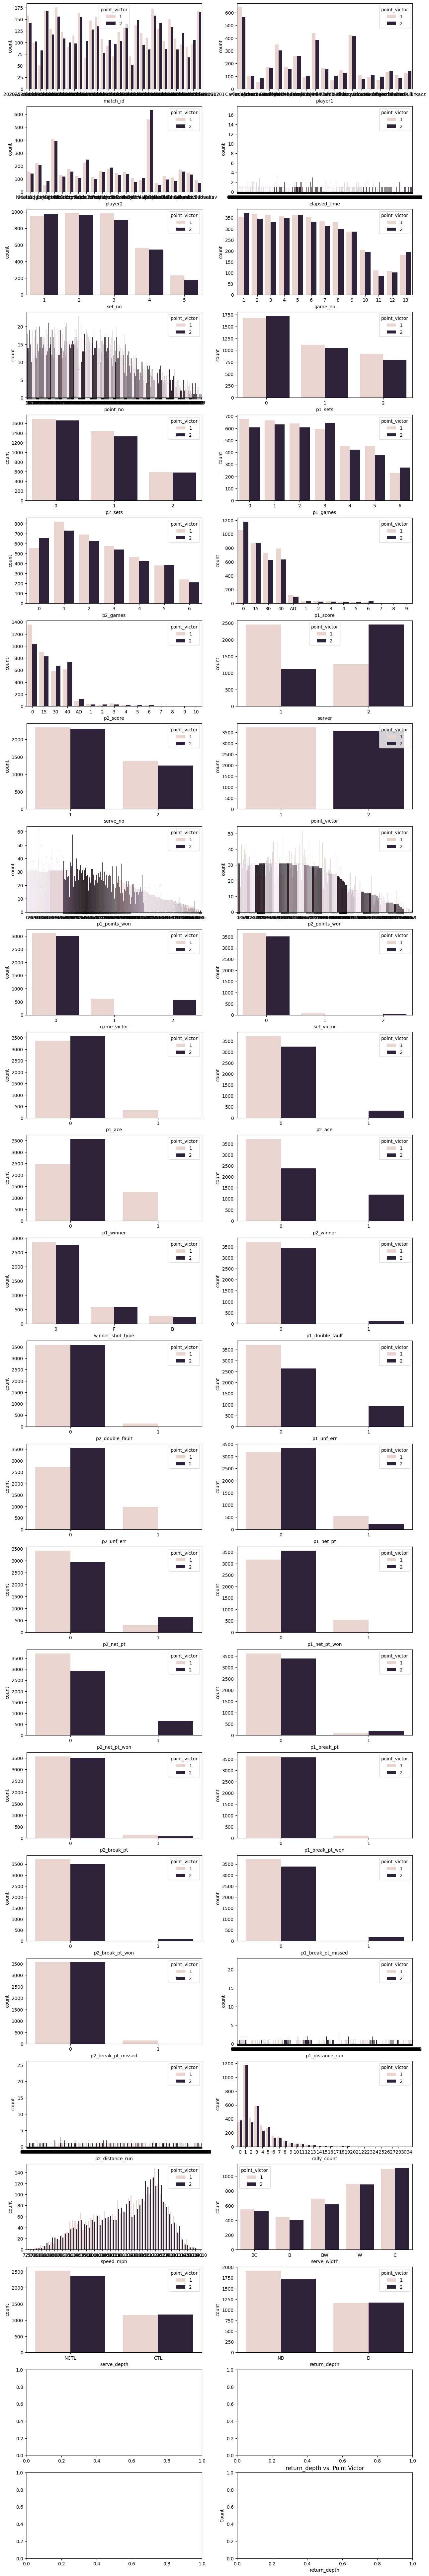

In [ ]:
fig, ax = plt.subplots( len(df.columns)//2 + 2, 2, figsize=(15, 100))
j = 0
for i, col in enumerate(df.columns):
    sns.countplot(x=col, hue='point_victor', data=df, ax=ax[j, i%2])
    plt.title(f'{col} vs. Point Victor')
    plt.xlabel(col)
    plt.ylabel('Count')
    # plt.legend(title='Point Victor')
    if i % 2 == 1:
        j += 1
plt.show()

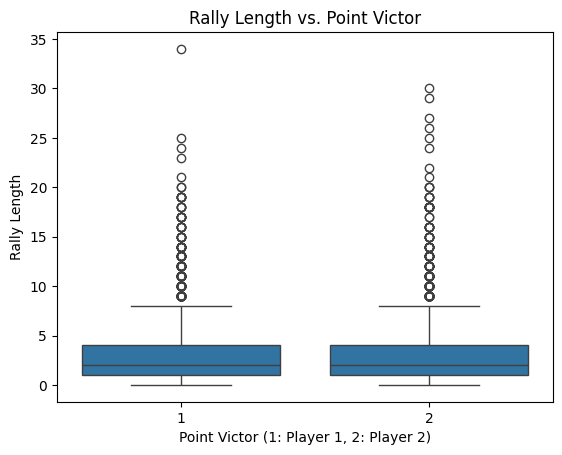

In [ ]:
sns.boxplot(x='point_victor', y='rally_count', data=df)
plt.title('Rally Length vs. Point Victor')
plt.xlabel('Point Victor (1: Player 1, 2: Player 2)')
plt.ylabel('Rally Length')
plt.show()


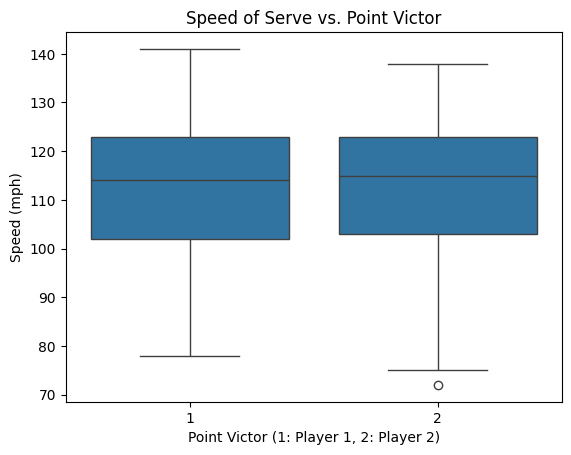

In [ ]:
sns.boxplot(x='point_victor', y='speed_mph', data=df)
plt.title('Speed of Serve vs. Point Victor')
plt.xlabel('Point Victor (1: Player 1, 2: Player 2)')
plt.ylabel('Speed (mph)')
plt.show()

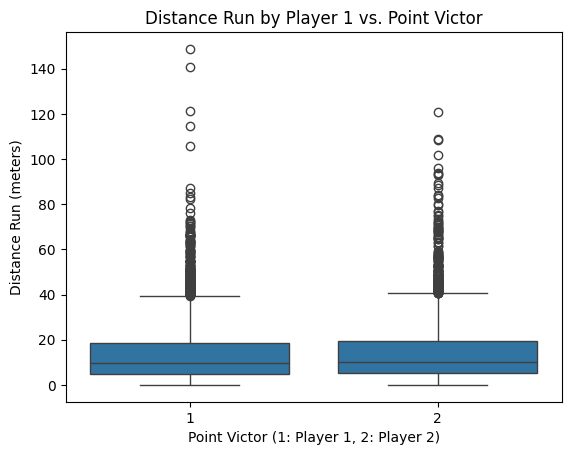

In [ ]:
sns.boxplot(x='point_victor', y='p1_distance_run', data=df)
plt.title('Distance Run by Player 1 vs. Point Victor')
plt.xlabel('Point Victor (1: Player 1, 2: Player 2)')
plt.ylabel('Distance Run (meters)')
plt.show()

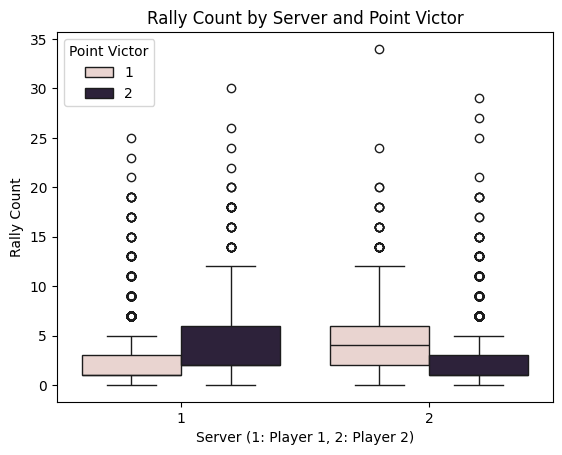

In [ ]:
sns.boxplot(x='server', y='rally_count', hue='point_victor', data=df)
plt.title('Rally Count by Server and Point Victor')
plt.xlabel('Server (1: Player 1, 2: Player 2)')
plt.ylabel('Rally Count')
plt.legend(title='Point Victor')
plt.show()

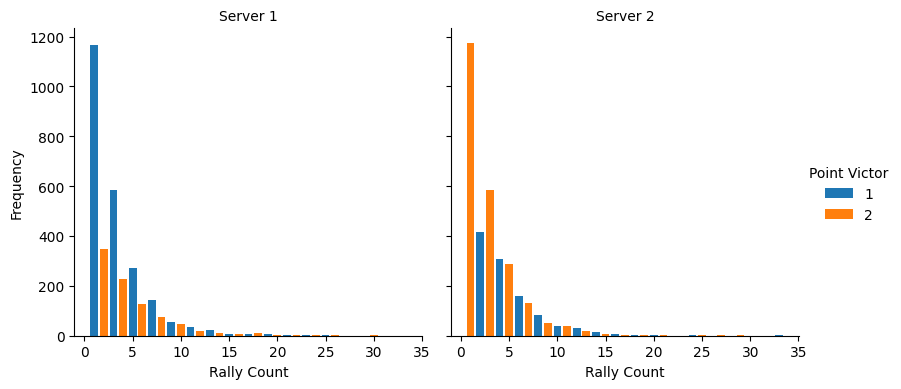

In [ ]:
g = sns.FacetGrid(df, col='server', hue='point_victor', height=4)
g.map(plt.hist, 'rally_count', bins=range(1, max(df['rally_count'])+1), align='left', rwidth=0.8)
g.set_titles('Server {col_name}')
g.set_axis_labels('Rally Count', 'Frequency')
g.add_legend(title='Point Victor')
plt.show()

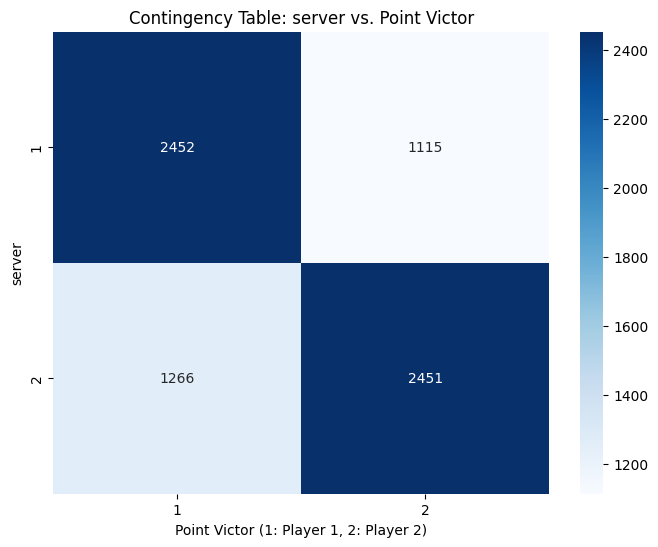

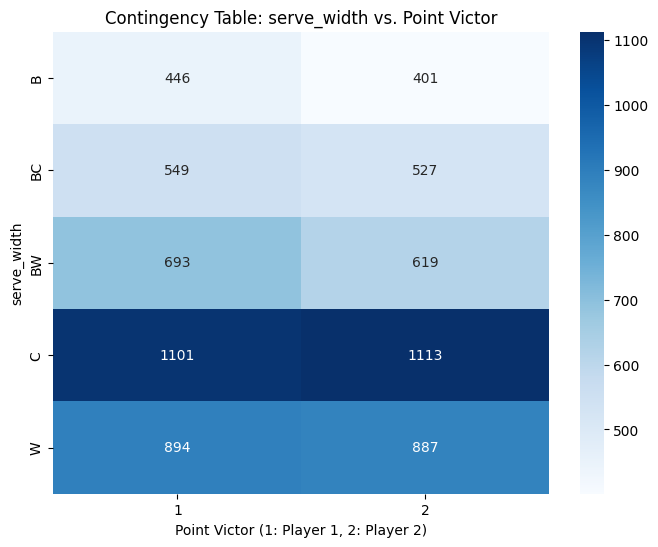

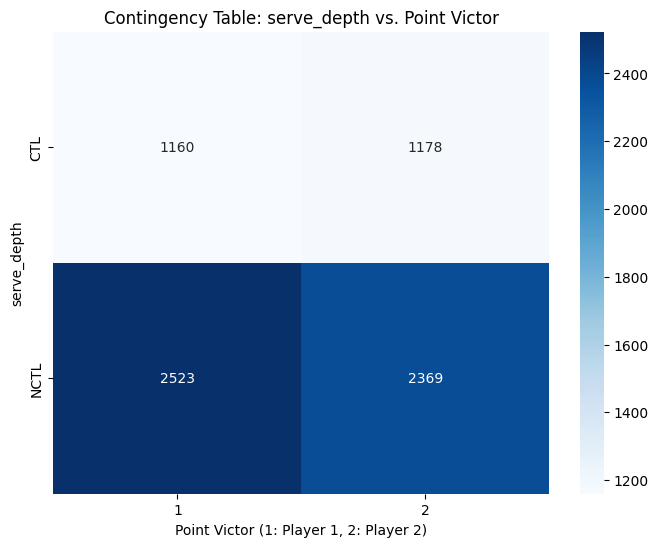

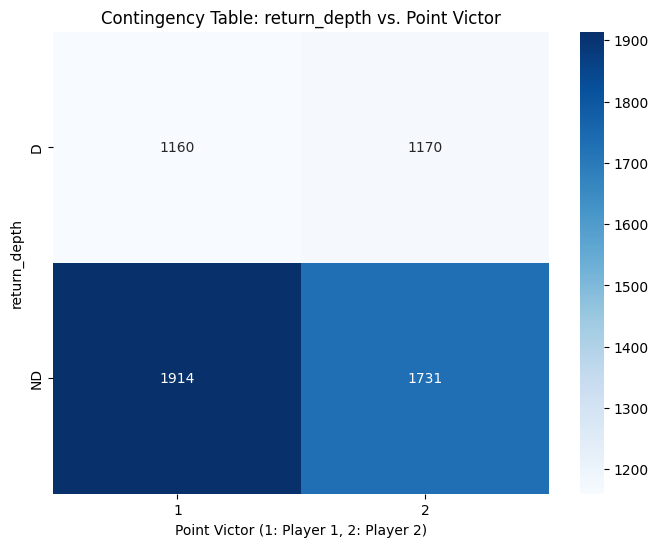

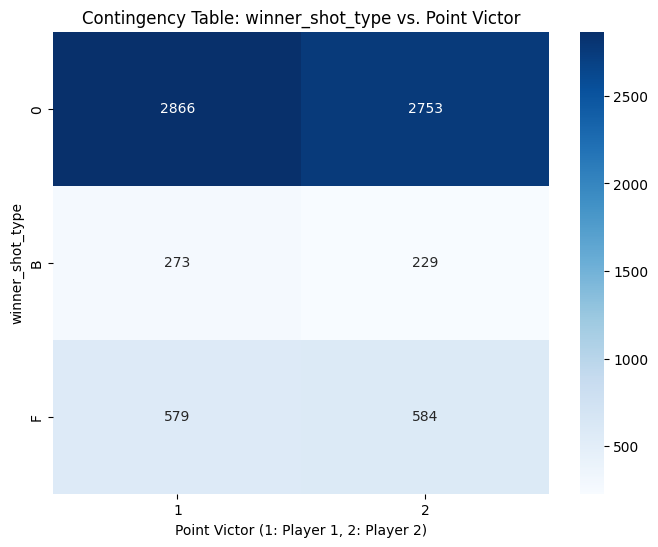

In [ ]:
# Select categorical variables from your dataset
categorical_variables = ['server', 'serve_width', 'serve_depth', 'return_depth', 'winner_shot_type']

# Create contingency tables for each categorical variable
contingency_tables = {}
for variable in categorical_variables:
    contingency_table = pd.crosstab(df[variable], df['point_victor'])
    contingency_tables[variable] = contingency_table

# Plot heatmaps for contingency tables
for variable, contingency_table in contingency_tables.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Contingency Table: {variable} vs. Point Victor')
    plt.xlabel('Point Victor (1: Player 1, 2: Player 2)')
    plt.ylabel(f'{variable}')
    plt.show()

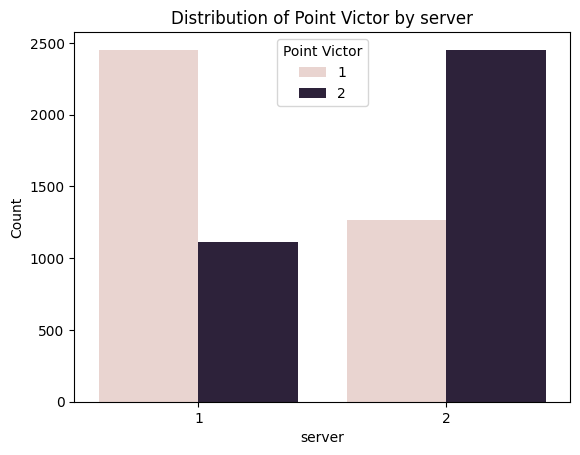

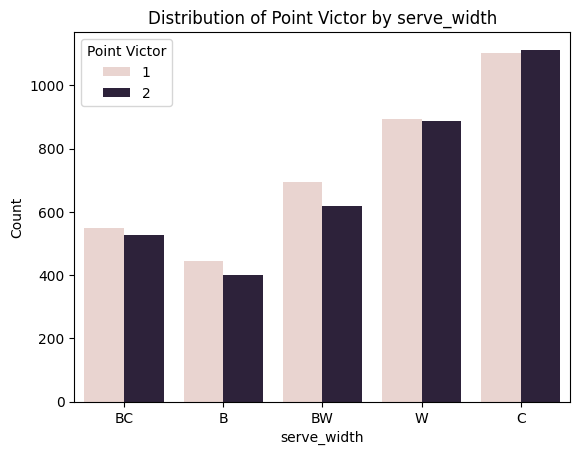

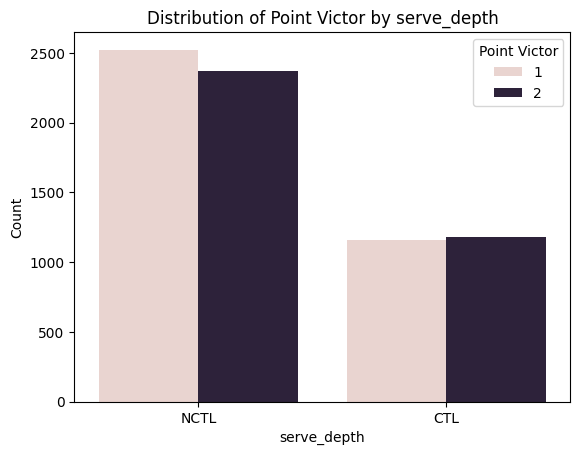

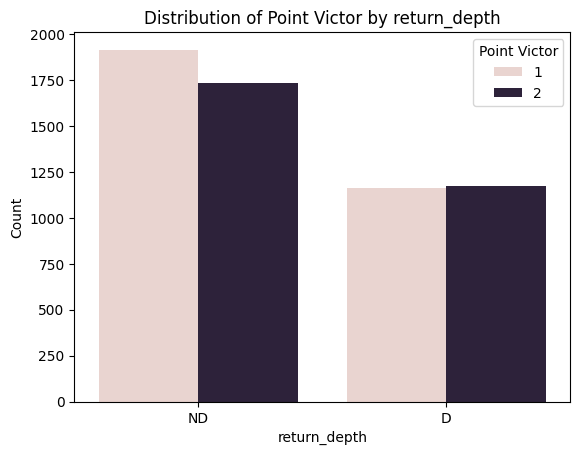

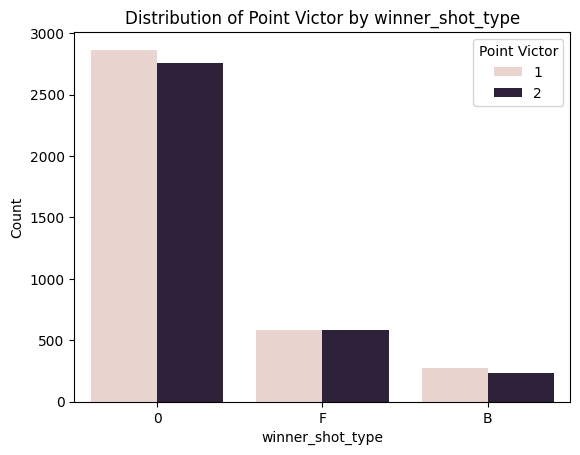

In [ ]:
# Plot countplots for each categorical variable
for variable in categorical_variables:
    sns.countplot(x=variable, hue='point_victor', data=df)
    plt.title(f'Distribution of Point Victor by {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.legend(title='Point Victor')
    plt.show()

In [12]:
def add_match_victor(df):
    match_df = divide_by_matches(df)
    for match in match_df:
        winner = match_winner(match)
        match.loc[:, "match_victor"] = winner
    return pd.concat(match_df)
    

In [13]:
df = add_match_victor(df)
match_victor_1 = df[df['match_victor'] == 1]
match_victor_2 = df[df['match_victor'] == 2]

match_victor_1.loc[:,"set_diff"] = (match_victor_1["p1_sets"] - match_victor_1["p2_sets"]) 
match_victor_2.loc[:,"set_diff"] = (match_victor_2["p2_sets"] - match_victor_2["p1_sets"]) 

match_victor_1.loc[:,"game_diff"] = (match_victor_1["p1_games"] - match_victor_1["p2_games"])
match_victor_2.loc[:,"game_diff"] = (match_victor_2["p2_games"] - match_victor_2["p1_games"]) 

# Probablity that the player with set_diff in favor wins the match
prob_set_diff = ((match_victor_1["set_diff"] > 0).sum() + (match_victor_2["set_diff"] > 0).sum()) / (len(match_victor_1) + len(match_victor_2))

# Probablity that the player with game_diff in favor wins the match
prob_game_diff = ((match_victor_1["game_diff"] > 0).sum() + (match_victor_2["game_diff"] > 0).sum()) / (len(match_victor_1) + len(match_victor_2))
prob_set_diff, prob_game_diff

/var/folders/qv/f4vv6vrd3qn96rx6p0mvm4dc0000gn/T/ipykernel_54430/736005541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match.loc[:, "match_victor"] = winner
/var/folders/qv/f4vv6vrd3qn96rx6p0mvm4dc0000gn/T/ipykernel_54430/736005541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match.loc[:, "match_victor"] = winner
/var/folders/qv/f4vv6vrd3qn96rx6p0mvm4dc0000gn/T/ipykernel_54430/736005541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

(0.44796814936847884, 0.39621087314662273)

In [58]:
matches_df[0]["p1_ace"].cumsum()

0       0
1       0
2       0
3       0
4       1
       ..
295    12
296    12
297    12
298    12
299    12
Name: p1_ace, Length: 300, dtype: int64

In [30]:
def plot_column_vs_columns(match_df, col, cols):
    fig, ax = plt.subplots(len(cols) // 2 + 2, 2, figsize=(20, 10))
    j = 0
    for i, column in enumerate(cols):
        sns.countplot(x=column, hue=col, data=match_df, ax=ax[j, i % 2])
        plt.title(f"{column} vs. {col}")
        plt.xlabel(column)
        plt.ylabel("Count")
        fig.legend(title="Point Victor")
        if i % 2 == 1:
            j += 1
    plt.savefig("Data/Plots/plot_column_vs_columns.png")


def plot_match_flow(tmp_match_df, coeff=None):
    # for i in [1, 2]:
    #     prob_set_diff, prob_game_diff = (0.44796814936847884, 0.39621087314662273)
    #     match_df.loc[:,f"p{i}_flow"] = (match_df[f"p{i}_sets"] - match_df[f"p{3-i}_sets"]) * prob_set_diff/2 + (match_df[f"p{i}_games"] - match_df[f"p{3-i}_games"]) *prob_game_diff/2 + (match_df[f"p{i}_points_won"] - match_df[f"p{3-i}_points_won"]) * 0.033

    map_score = {"0": 0, "15": 1, "30": 2, "40": 3, "AD": 4}
    # for i in [1, 2]:
    #     c1, c2, c3, c4, c5 = coeff
    #     match_df.loc[:, f"p{i}_flow"] = (
    #         (c1 / 2) * (match_df[f"p{i}_sets"] - match_df[f"p{3-i}_sets"])
    #         + (c2 / 5) * (match_df[f"p{i}_games"] - match_df[f"p{3-i}_games"])
    #         + c3 * (match_df["server"].apply(lambda x: 1 if x == i else 0))
    #         + (c4 / 3)
    #         * (
    #             match_df[f"p{i}_score"].apply(lambda x: map_score.get(x) if x in map_score else int(x))
    #             - match_df[f"p{3-i}_score"].apply(lambda x: map_score.get(x) if x in map_score else int(x))
    #         )
    #         + c5 * (match_df[f"p{i}_ace"].cumsum() - match_df[f"p{3-i}_ace"].cumsum())
    #     )

    prob = Probablities(2 / 3)
    
    match_df = tmp_match_df.copy()
    # if any row has p1_score as "AD" then replace it with 3 and p2_score with 2
    match_df.loc[:, "p1_score"] = match_df["p1_score"].apply(
        lambda x: map_score.get(x) if x in map_score else int(x)
    )
    match_df.loc[:, "p2_score"] = match_df["p2_score"].apply(
        lambda x: map_score.get(x) if x in map_score else int(x)
    )
    match_df[["p1_score", "p2_score"]] = match_df[["p1_score", "p2_score"]].where(
        match_df["p1_score"] != 4, [3, 2]
    )
    match_df[["p1_score", "p2_score"]] = match_df[["p1_score", "p2_score"]].where(
        match_df["p2_score"] != 4, [2, 3]
    )
    
    print(np.unique(match_df["p1_score"]))
    print(np.unique(match_df["p2_score"]))

    for i in [1, 2]:
        # Apply the formula to calculate the flow in each row
        print("======================================")
        match_df.loc[:, f"p{i}_flow"] = match_df.apply(
            lambda x: prob.P_win(
                (
                    int(x[f"p{i}_sets"]),
                    int(x[f"p{3-i}_sets"]),
                    int(x[f"p{i}_games"]),
                    int(x[f"p{3-i}_games"]),
                    int(x[f"p{i}_score"]),
                    int(x[f"p{3-i}_score"]),
                )
            ),
            axis=1,
        )

    # figure size
    plt.figure(figsize=(20, 10))
    sns.lineplot(x=match_df.index, y="p1_flow", data=match_df, linewidth=0.5)
    # Plot y = 0 line
    plt.axhline(0, color="black", linewidth=1.5, linestyle="-")

    # get the indexes of the set changes
    sets = divide_by_sets(match_df)
    for i, set in enumerate(sets):
        # draw vertical lines at the beginning of each set
        plt.axvline(
            set.index[-1],
            color="black",
            linewidth=0.5,
            linestyle="-",
            label=f"Set {i+1}",
        )
        plt.text(
            set.index[-1],
            0,
            f"Set {i+1}",
            rotation=90,
            verticalalignment="top",
            horizontalalignment="right",
            fontdict={"color": "black", "size": 8},
        )

    # fill with color blue if p1_flow > 0 and red if p1_flow < 0
    plt.fill_between(
        match_df.index,
        match_df["p1_flow"],
        0,
        where=match_df["p1_flow"] > 0,
        interpolate=True,
        color="blue",
        alpha=0.3,
    )
    plt.fill_between(
        match_df.index,
        match_df["p1_flow"],
        0,
        where=match_df["p1_flow"] < 0,
        interpolate=True,
        color="red",
        alpha=0.3,
    )
    # sns.lineplot(x=match_df.index, y="p2_flow", data=match_df, label="Player 2")
    plt.title("Match Flow")
    plt.xlabel("Point")
    plt.ylabel("Flow")
    plt.xticks(np.arange(match_df.index[0], match_df.index[-1], 15), rotation=90)
    # plt.legend(title='Players')
    plt.show()

    sns.lineplot(x=match_df.index, y="p1_flow", data=match_df, label="Player 1")
    sns.lineplot(x=match_df.index, y="p2_flow", data=match_df, label="Player 2")
    plt.title("Match Flow")
    plt.xlabel("Point")
    plt.ylabel("Flow")
    plt.xticks(np.arange(match_df.index[0], match_df.index[-1], 15), rotation=90)
    plt.legend(title="Players")
    plt.show()

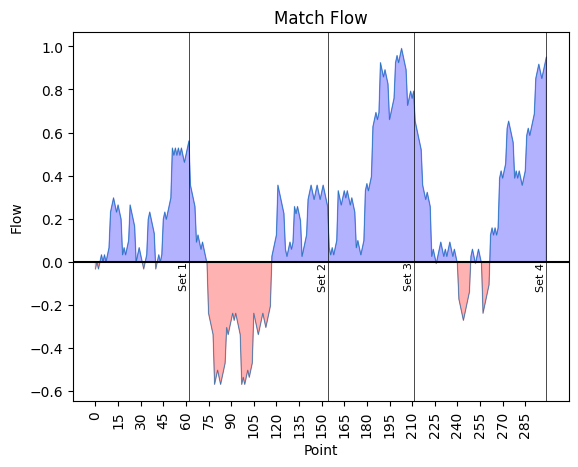

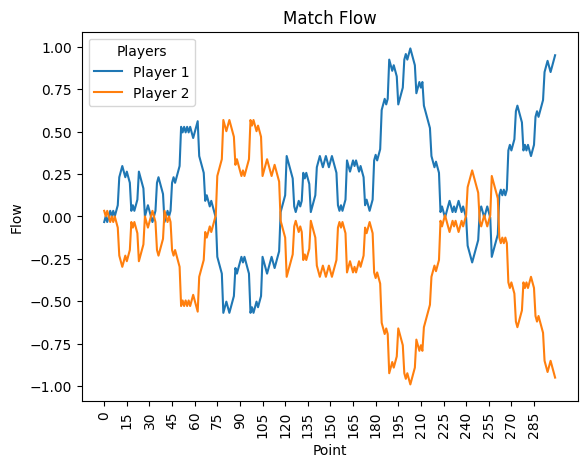

In [23]:
plot_match_flow(matches_df[0])

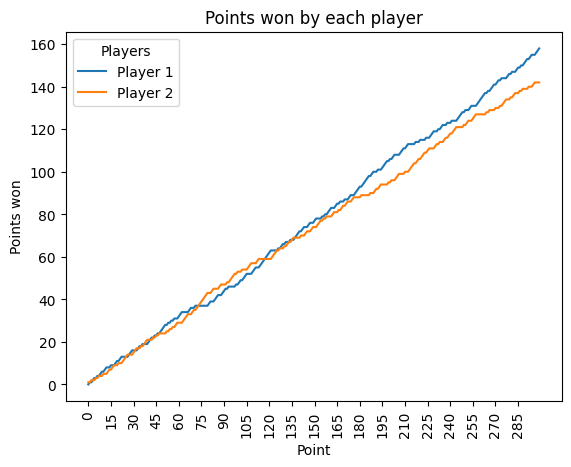

In [ ]:
def plot_player_points(match_df):
    sns.lineplot(x=match_df.index, y="p1_points_won", data=match_df, label="Player 1")
    sns.lineplot(x=match_df.index, y="p2_points_won", data=match_df, label="Player 2")
    plt.title('Points won by each player')
    plt.xlabel('Point')
    plt.ylabel('Points won')
    plt.xticks(np.arange(match_df.index[0], match_df.index[-1], 15), rotation=90)
    plt.legend(title='Players')
    plt.show()

plot_player_points(matches_df[0])


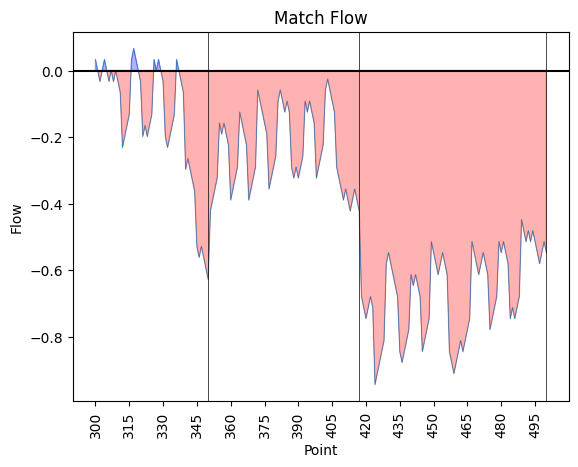

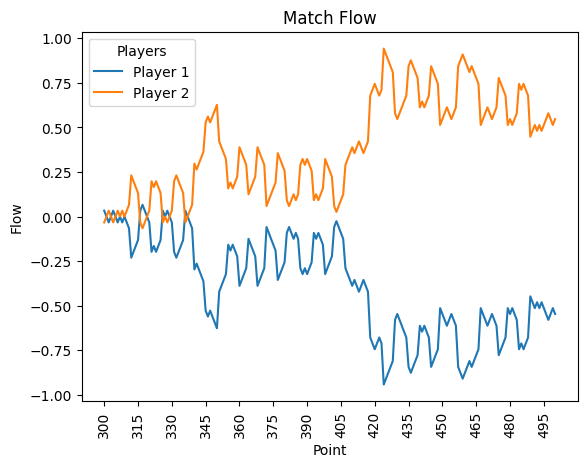

In [ ]:
plot_match_flow(matches_df[1])

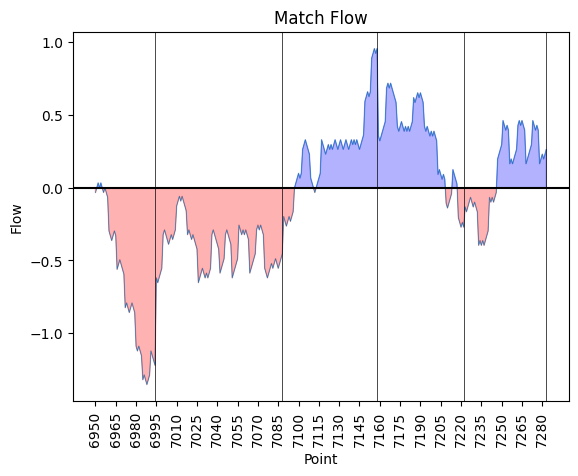

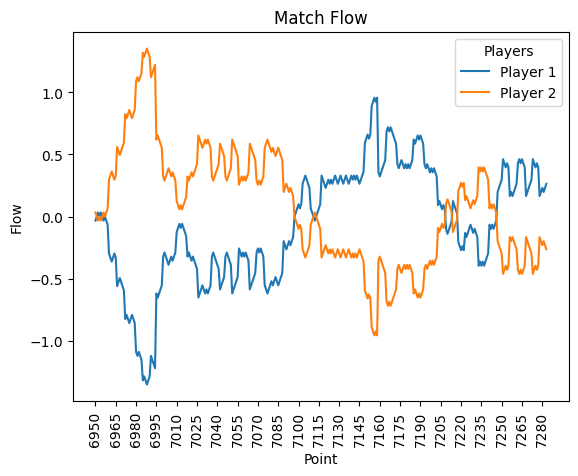

In [ ]:
plot_match_flow(matches_df[-1])

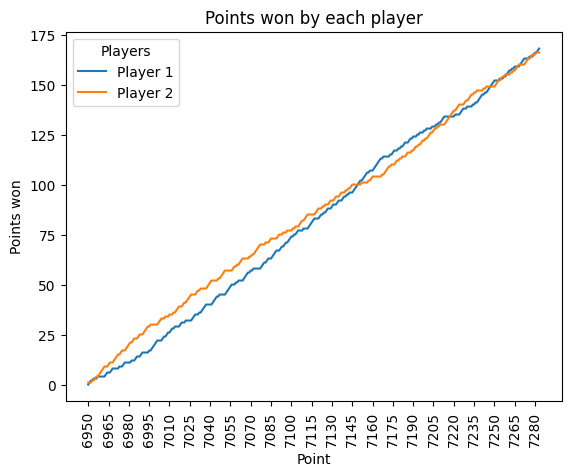

In [ ]:
plot_player_points(matches_df[-1])

In [25]:
def calc_prob(df, col):
    df = add_match_victor(df)
    match_victor_1 = df[df['match_victor'] == 1]
    match_victor_2 = df[df['match_victor'] == 2]

    prob = ((match_victor_2[f"p1_{col}"] == 1).sum() + (match_victor_2[f"p2_{col}"] == 1).sum()) / (len(match_victor_1) + len(match_victor_2))
    return prob



In [26]:
calc_prob(df, "ace")

0.03322350356946733

In [ ]:
calc_prob(df, "break_pt_won") # wining a break point does not have a significant effect on the match outcome

0.0060406370126304225

In [51]:
def P_win_and_set_lead(df):
    df = add_match_victor(df)
    match_victor_1 = df[df['match_victor'] == 1]
    match_victor_2 = df[df['match_victor'] == 2]

    total_sets = 0
    lead1 = 0
    for match in divide_by_matches(match_victor_1):
        sets = divide_by_sets(match)
        lead = [ set["p1_sets"].iloc[0] > set["p2_sets"].iloc[0] for set in sets]
        total_sets += len(lead)
        lead1 += sum(lead)
    
    for match in divide_by_matches(match_victor_2):
        sets = divide_by_sets(match)
        lead = [ set["p2_sets"].iloc[0] > set["p1_sets"].iloc[0] for set in sets]
        total_sets += len(lead)
        lead1 += sum(lead)
    
    return lead1/total_sets

def P_win_and_game_lead(df):
    df = add_match_victor(df)
    match_victor_1 = df[df['match_victor'] == 1]
    match_victor_2 = df[df['match_victor'] == 2]

    total_games = 0
    lead1 = 0
    for match in divide_by_matches(match_victor_1):
        for set in divide_by_sets(match):
            games = divide_by_games(set)
            lead = [ game["p1_games"].iloc[0] > game["p2_games"].iloc[0] for game in games]
            total_games += len(lead)
            lead1 += sum(lead)
    
    for match in divide_by_matches(match_victor_2):
        for set in divide_by_sets(match):
            games = divide_by_games(set)
            lead = [ game["p2_games"].iloc[0] > game["p1_games"].iloc[0] for game in games]
            total_games += len(lead)
            lead1 += sum(lead)

    return lead1/total_games    

def P_win_set_and_game_lead(df):
    total_games = 0
    lead1 = 0
    for match in divide_by_matches(df):
        for set in divide_by_sets(match):
            games = divide_by_games(set)
            if set["set_victor"].sum() == 1:
                lead = [ game["p1_games"].iloc[0] > game["p2_games"].iloc[0] for game in games]
                total_games += len(lead)
                lead1 += sum(lead)
            elif set["set_victor"].sum() == 2:
                lead = [ game["p2_games"].iloc[0] > game["p1_games"].iloc[0] for game in games]
                total_games += len(lead)
                lead1 += sum(lead)
    
    return lead1/total_games   

def P_win_game_and_is_server(df):
   total_games = 0
   lead1 = 0
   for match in divide_by_matches(df):
       for set in divide_by_sets(match):
           for game in divide_by_games(set):
               total_games += 1
               if game["server"].iloc[0] == game["game_victor"].iloc[-1]:
                   lead1 += 1
   return lead1/total_games




In [52]:
P_win_game_and_is_server(df) # the server has a slight advantage

0.8409090909090909

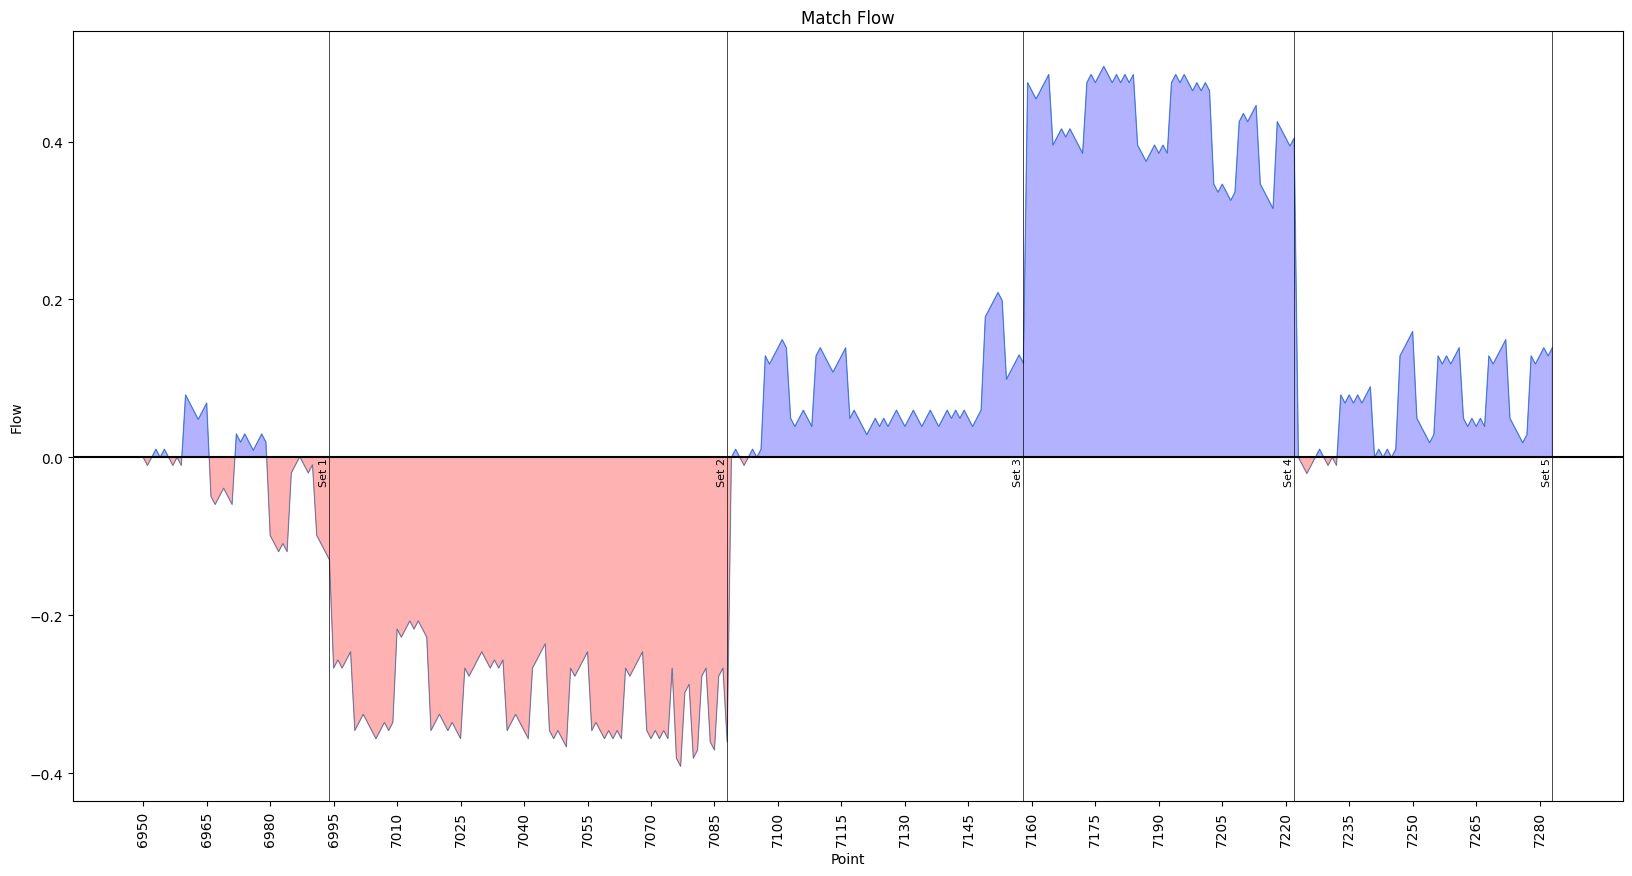

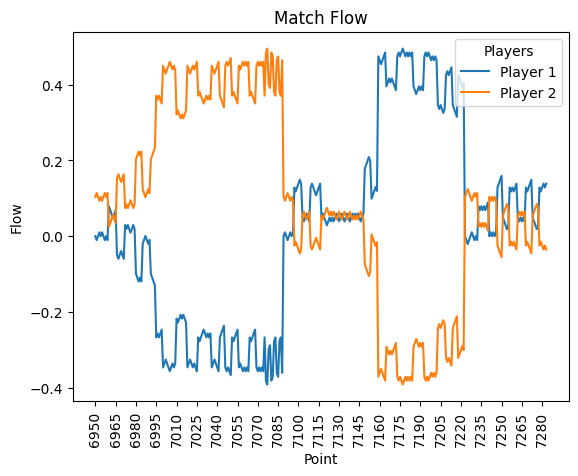

In [61]:
# plot_match_flow(matches_df[-1], [0.44796814936847884, 0.39621087314662273,0, 0.1, 0])
plot_match_flow(matches_df[-1], [600/809, 100/809, 84/809, 25/809,0])

In [31]:
class Probablities:
    def __init__(self, Fij, state=(0, 0, 0, 0, 0, 0)):
        self.Fij = Fij

        self.state = state
        self.P_g_cache = {}
        self.P_s_cache = {}
        self.P_tb_cache = {}
        self.P_m_cache = {}

    def set_state(self, state):
        if len(state) != 6:
            raise ValueError("state should be a tuple or a list")

        si, sj, gi, gj, xi, xj = state
        map_score = {"0": 0, "15": 1, "30": 2, "40": 3}
        if xi in map_score and xj in map_score:
            self.state = (si, sj, gi, gj, map_score[xi], map_score[xj])
        elif xi == "AD":
            self.state = (si, sj, gi, gj, 3, 2)
        elif xj == "AD":
            self.state = (si, sj, gi, gj, 2, 3)
        else:
            self.state = (si, sj, gi, gj, xi, xj)
        return self.state

    def P_g(self, state):
        """
        P_g(xi, xj)
        """
        if len(state) != 6:
            raise ValueError("state should be a tuple or a list")

        si, sj, gi, gj, xi, xj = state

        # Check in cache
        if state in self.P_g_cache:
            return self.P_g_cache[state]

        if xi == 4 and xj <= 2:
            p = 1
        elif xj == 4 and xi <= 2:
            p = 0
        elif xi == 3 and xj == 3:
            p = (self.Fij**2) / (self.Fij**2 + (1 - self.Fij) ** 2)
        else:
            p = self.Fij * self.P_g((si, sj, gi, gj, xi + 1, xj)) + (
                1 - self.Fij
            ) * self.P_g((si, sj, gi, gj, xi, xj + 1))

        print(f"P_g({state}) = {p}")
        self.P_g_cache[state] = p
        return p

    def P_s(self, state):
        """
        P_s(gi, gj)
        """
        if len(state) != 6:
            raise ValueError("state should be a tuple or a list")

        si, sj, gi, gj, xi, xj = state
        if gi >= 6 and (gi - gj) <= 4:
            p= 1
        elif gj >= 6 and (gj - gj) <= 4:
            p= 0
        elif gi == 6 and gj == 6:
            p= self.P_tb(state)
        else:
            p= self.P_g((si, sj, gi, gj, 0, 0)) * (
                1 - self.P_s((si, sj, gj, gi + 1, xi, xj))
            ) + (1 - self.P_g((si, sj, gi, gj, 0, 0))) * self.P_s(
                (si, sj, gj + 1, gi, xi, xj)
            )
        print(f"P_s({state}) = {p}")
        return p

    def P_tb(self, state):  # Ambiguous
        if len(state) != 6:
            raise ValueError("state should be a tuple or a list")
        raise NotImplementedError
        si, sj, gi, gj, xi, xj = state
        if xi >= 7 and xi - xj >= 5:
            return 1
        elif xj >= 7 and xj - xi >= 2:
            return 0
        elif (xi + xj) % 2 == 1:
            return self.Fij * self.P_tb((si, sj, gi + 1, gj, xi, xj)) + (
                1 - self.Fij
            ) * self.P_tb((si, sj, gi, gj + 1, xi, xj))
        else:
            return self.Fij * (1 - self.P_tb((si, sj, gj, gi + 1, xi, xj))) + (
                1 - self.Fij
            ) * self.P_tb((si, sj, gj + 1, gi, xi, xj))

    def P_m(self, state):
        if len(state) != 6:
            raise ValueError("state should be a tuple or a list")
        si, sj, gi, gj, xi, xj = state

        # Check in cache
        if state in self.P_m_cache:
            return self.P_m_cache[state]
        if si >= 2:
            p= 1
        elif sj >= 2:
            p =0
        else:
            p = self.P_s((si, sj, 0, 0, xi, xj)) * self.P_m(
                (si + 1, sj, gi, gj, xi, xj)
            ) + (1 - self.P_s((si, sj, 0, 0, xi, xj))) * self.P_m(
                (si, sj + 1, gi, gj, xi, xj)
            )
        print(f"P_m({state}) = {p}")
        self.P_m_cache[state] = p
        return p

    def P_win(self, state):
        if len(state) != 6:
            raise ValueError("state should have 6 elements")

        si, sj, gi, gj, xi, xj = state

        # Check in cache
        if state in self.P_m_cache:
            return self.P_m_cache[state]
        
        p = self.Fij * self.P_m((si, sj, gi, gj, xi + 1, xj)) + (
            1 - self.Fij
        ) * self.P_m((si, sj, gi, gj, xi, xj + 1))
        print(f"P_win({state}) = {p}")
        print("----------------")

        self.P_m_cache[state] = p
        return p